# Regresión lineal simple

En este archivo se desarrolla el algortimo de **regresión lineal simple** para estimar la edad estellar mediante las características 'Seq', 'M', 'R', 'Teff','L','Meta','logg','Prot' y 'Age'. 
Para comparar la calidad en la estimación mediante cada una de las características, se implementa un bucle y se almacenan los resultados en el dataframe final.

In [10]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, max_error

df = pd.read_csv('/Users/jarmireciomartinez/Doctorado_Python/Pruebas_regresion/gyro_tot_v20180801.txt', sep="\t", header=0)
df

,Seq,SIMBAD_ID,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,...,cutoff,class,type,cat1,cat2,e_M,e_R,e_Teff,e_L,mode
0,1,KIC10003270,1.416000,0.207466,0.103233,2.362000,0.114948,0.098478,6594,69,...,3.471749,MS,F,serenelli17,garcia14,10.970989,4.517914,1.046406,9.498159,Ast
1,2,KIC10016239,1.264000,0.054037,0.059641,1.298000,0.024698,0.025554,6482,51,...,3.545165,MS,F,serenelli17,garcia14,4.496741,1.935749,0.786794,8.232459,Ast
2,3,KIC10024648,1.444000,0.087693,0.137295,2.000000,0.050448,0.060208,6409,157,...,3.593017,MS,F,serenelli17,garcia14,7.790441,2.766399,2.449680,8.551756,Ast
3,4,KIC10025841,1.121000,0.133195,0.096649,1.521000,0.094557,0.085094,5738,187,...,4.032857,MS,G,serenelli17,garcia14,10.251748,5.905685,3.258975,8.542442,Ast
4,5,KIC10068307,1.608100,0.026300,0.026300,2.164600,0.013900,0.013900,6132,77,...,3.774590,MS,F,silva17,garcia14,1.635470,0.642151,1.255708,6.023016,Ast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1460,KIC9837012,0.886374,0.022743,0.022743,0.777651,0.055476,0.055476,5579,183,...,4.137082,MS,G,mathur17,meibom11,2.565851,7.133751,3.432515,11.812753,Clust
1460,1461,KIC9838215,0.975155,0.022871,0.022871,0.919946,0.057136,0.057136,5776,138,...,4.007948,MS,G,mathur17,meibom11,2.345409,6.210840,2.683518,10.759006,Clust
1461,1462,KIC9896609,0.762092,0.022697,0.022697,0.650313,0.050160,0.050160,5024,151,...,4.500884,MS,K,mathur17,meibom11,2.978281,7.713252,2.856290,14.843708,Clust
1462,1463,KIC9896700,1.017446,0.022739,0.022739,0.982039,0.059040,0.059040,5889,142,...,3.933877,MS,G,mathur17,meibom11,2.234908,6.011960,2.708439,10.073298,Clust


In [11]:
# Se eliminan las filas con valores NULL/NA
df = df.dropna()

In [12]:
df_2 = df[['Seq', 'M', 'R', 'Teff','L','Meta','logg','Prot','Age']]
df_2

,Seq,M,R,Teff,L,Meta,logg,Prot,Age
0,1,1.4160,2.3620,6594,9.8470,-0.181,3.8480,7.090,2.4670
1,2,1.2640,1.2980,6482,2.5670,-0.005,4.3120,4.910,1.2890
2,3,1.4440,2.0000,6409,5.8750,-0.006,3.9940,10.580,2.3400
3,4,1.1210,1.5210,5738,3.1810,0.197,4.1270,11.840,7.2890
4,5,1.6081,2.1646,6132,6.6910,-0.230,3.9732,18.600,2.0082
...,...,...,...,...,...,...,...,...,...
307,308,1.2910,1.7750,6550,5.8370,-0.307,4.0480,10.340,2.8120
308,309,1.1680,2.0140,6074,5.2160,-0.314,3.8960,21.070,4.9240
309,310,1.6260,3.3990,5936,14.4300,-0.054,3.5880,15.650,1.7790
310,311,1.5300,2.7640,6000,9.8680,0.160,3.7390,17.295,2.4890


In [89]:
#Definición de las variables a emplear

Y = np.array(df_2['Age']) #Predecir Age
#X = np.array(df_2[['M']]) #A través de la masa
X = df_2[['Seq', 'M', 'R', 'Teff','L','Meta','logg','Prot']] #A través de las demás columnas
X

,Seq,M,R,Teff,L,Meta,logg,Prot
0,1,1.4160,2.3620,6594,9.8470,-0.181,3.8480,7.090
1,2,1.2640,1.2980,6482,2.5670,-0.005,4.3120,4.910
2,3,1.4440,2.0000,6409,5.8750,-0.006,3.9940,10.580
3,4,1.1210,1.5210,5738,3.1810,0.197,4.1270,11.840
4,5,1.6081,2.1646,6132,6.6910,-0.230,3.9732,18.600
...,...,...,...,...,...,...,...,...
307,308,1.2910,1.7750,6550,5.8370,-0.307,4.0480,10.340
308,309,1.1680,2.0140,6074,5.2160,-0.314,3.8960,21.070
309,310,1.6260,3.3990,5936,14.4300,-0.054,3.5880,15.650
310,311,1.5300,2.7640,6000,9.8680,0.160,3.7390,17.295


In [107]:
#Bucle para cada una de las características

train_sc = []
test_sc = []

for i in range(8):
    
    aux = np.array(X.iloc[:,i])
    aux_2 = aux.reshape((300,1))
    
    #Se separa el 20% de los datos para test
    X_train, X_test, Y_train, Y_test = train_test_split(aux_2, Y, test_size=0.2)
        
    #Definición del algoritmo
    regr = linear_model.LinearRegression()

    #Entrenamiento del algoritmo
    regr.fit(X_train,Y_train)
    
    #Realizar una predicción
    Y_pred= regr.predict(X_test)
    
    #Precisión del algoritmo (train)
    train_sc.append(regr.score(X_train, Y_train))
    
    #Precisión del algoritmo (test)   
    test_sc.append(regr.score(X_test, Y_test))

[0.00044305172775405133, 0.5617561040464443, 0.08840338913600632, 0.3164335761772614, 0.15452683895960784, 0.013355782432753704, 0.019308950810024483, 0.09901064475246502]
[-0.04655989830721419, 0.4201921220005842, 0.08718436858834433, 0.45922178973495165, 0.1542964179005092, -0.04677199989937919, 0.03772006867941269, 0.06649306308451541]


In [108]:
result = pd.DataFrame({'features': ['Seq', 'M', 'R', 'Teff','L','Meta','logg','Prot'],
                       'train score': train_sc,
                       'test score': test_sc})
result

,features,train score,test score
0,Seq,0.000443,-0.046560
1,M,0.561756,0.420192
2,R,0.088403,0.087184
3,Teff,0.316434,0.459222
4,L,0.154527,0.154296
5,Meta,0.013356,-0.046772
6,logg,0.019309,0.037720
7,Prot,0.099011,0.066493


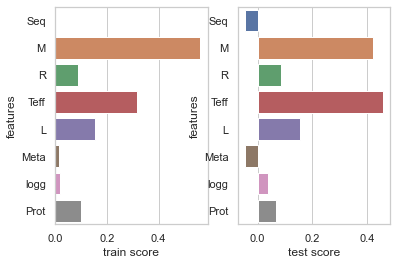

In [112]:
import seaborn as sns

fig, ax = plt.subplots(1, 2)

sns.set(style="whitegrid")
sns.barplot(ax = ax[0], y="features", x="train score", data=result)
sns.barplot(ax = ax[1], y="features", x="test score", data=result)
